**** 天宝站 ****

读取数据...
开始计算...
完成计算


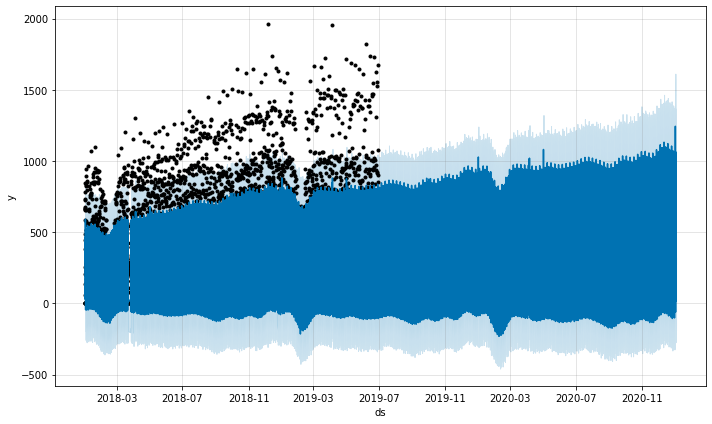

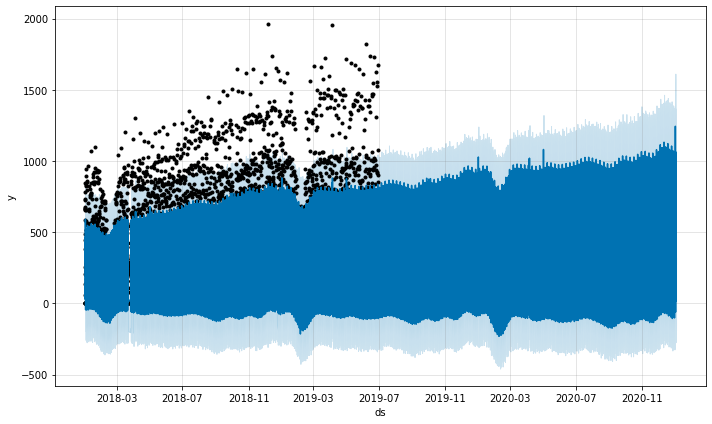

In [242]:
from fbprophet import Prophet
import pandas as pd

print("读取数据...")
df = pd.read_csv('./hd_test.csv')
df["ds"] = pd.to_datetime(df["ds"])
df["floor"] = 0.0 
df2 = df[df['ds'] < "2019-07-01 00:00:00"]
print("开始计算...")
m = Prophet(growth="linear", changepoint_prior_scale=0.01, 
        seasonality_prior_scale= 0.5, holidays_prior_scale=0.5, 
        weekly_seasonality=True, yearly_seasonality=True,
        daily_seasonality=True, seasonality_mode='multiplicative')
m.add_country_holidays(country_name='CN')
m.fit(df2)
future = m.make_future_dataframe(periods=13250, freq='H')
future["floor"] = 0.0 
fcst = m.predict(future)
print("完成计算")
m.plot(fcst)

因素分解


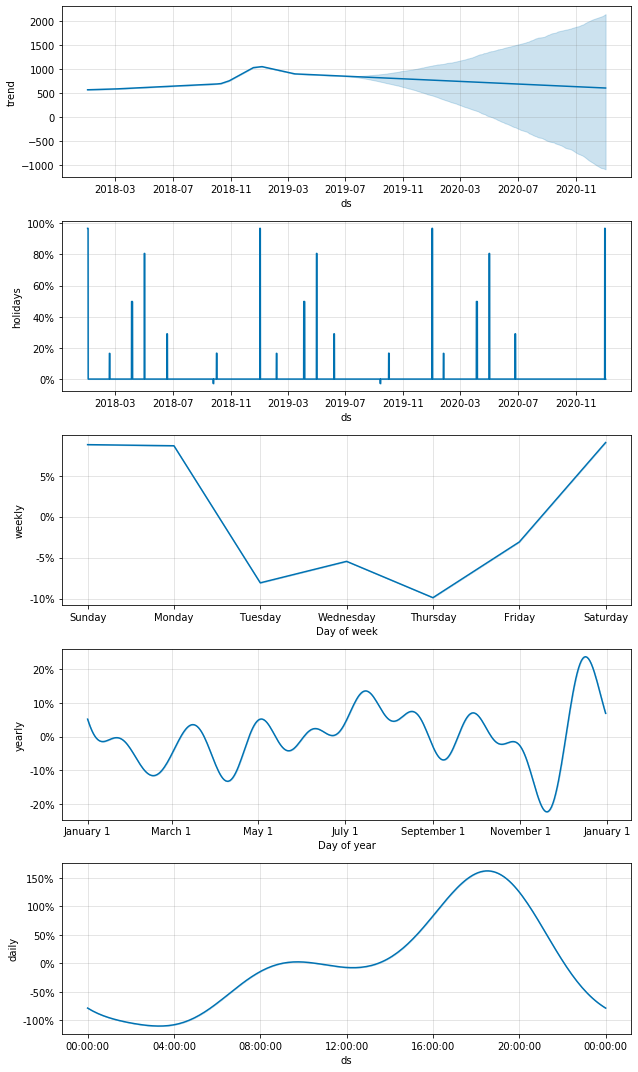

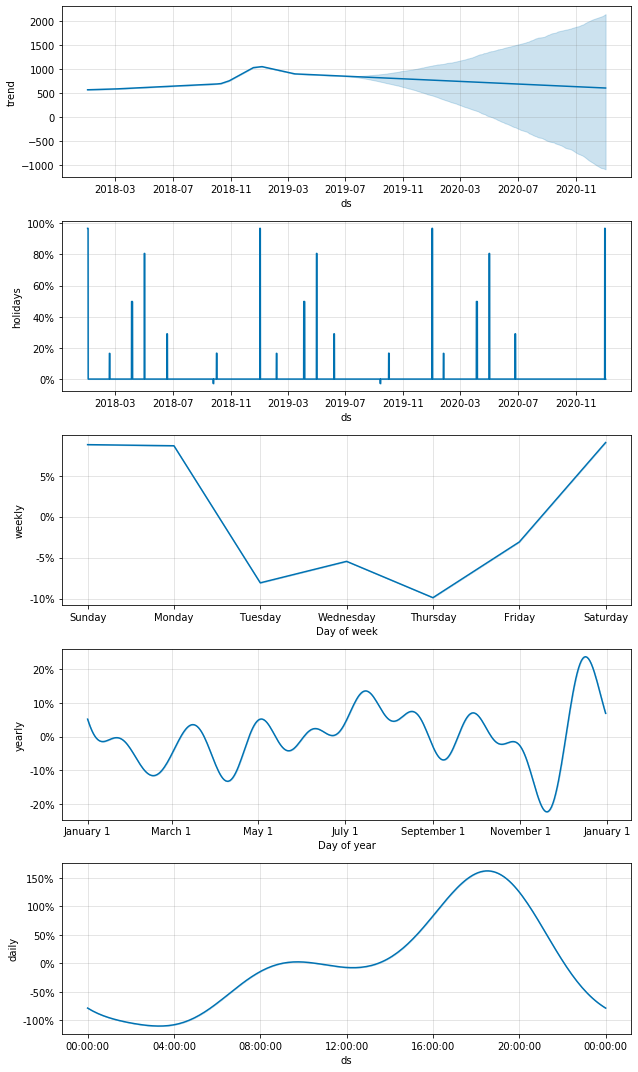

In [228]:
print("因素分解")
m.plot_components(fcst)

输出数据：

2019-07 模型预测进站量:788938 实际进站量:787079 总误差: 0.2362%


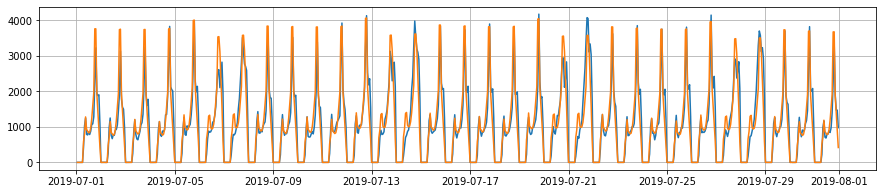

In [241]:
import numpy as np
import matplotlib.pyplot as plt 
    
fcst1 = fcst[["ds","yhat"]]
fds = []
fyh = []
for item in zip(fcst["ds"],fcst["yhat"]):
    v = item[1]
    if item[1] <= 0.0001: v = 0
    if item[0].hour <= 6: v = 0
    fds.append(item[0])
    fyh.append(v)
cols={"ds": fds,"yhat": fyh}
fcst1 = pd.DataFrame(cols,columns=['ds', 'yhat'])
print("输出数据：")

plt.figure(figsize=(15, 3))
plt.grid(True)

df1 = df[df['ds'] > "2019-07-01 00:00:00"]
df1 = df1[df1['ds'] < "2019-08-01 00:00:00"]
df1 = df1["y"]

pre = fcst1
pre1 = pre[pre['ds'] > "2019-07-01 00:00:00"]
pre1 = pre1[pre1['ds'] < "2019-08-01 00:00:00"]
x = pre1['ds']

pre1 = [ item for item in pre1["yhat"] ]

b = zip(x,pre1)
for i,item in enumerate(b):
    if item[0].hour >= 9 and item[0].hour <=9 and item[0].weekday() < 5: pre1[i] *= 1.4
    if item[0].hour >= 18 and item[0].hour <=19 and item[0].weekday() < 5: pre1[i] *= 1.7
    if item[0].hour >= 9 and item[0].hour <=10 and item[0].weekday() >= 5: pre1[i] *= 1.3
    if item[0].hour >= 18 and item[0].hour <=22 and item[0].weekday() >= 5: pre1[i] *= 1.5

fcst2 = fcst1[fcst1['ds'] > "2019-12-31 23:00:00"]
with open('hd_result.csv',"w") as f:
    for items in zip(fcst2["ds"], fcst2["yhat"]):
        k = items[0]
        v = items[1]
        if item[0].hour >= 9 and item[0].hour <=9 and item[0].weekday() < 5: v *= 1.4
        if item[0].hour >= 18 and item[0].hour <=19 and item[0].weekday() < 5: v *= 1.7
        if item[0].hour >= 9 and item[0].hour <=10 and item[0].weekday() >= 5: v *= 1.3
        if item[0].hour >= 18 and item[0].hour <=22 and item[0].weekday() >= 5: v *= 1.5
        f.write("%04d-%02d-%02d %02d:%02d:%02d,%d\n"%(k.year,k.month,k.day,k.hour,k.minute,k.second,int(v) if v - int(v) < 0.5 else int(v)+1))


print("\n2019-07 模型预测进站量:%d 实际进站量:%d 总误差: %.4f%%"%(int(sum(pre1)),int(sum(df1)),(sum(pre1)-sum(df1))/sum(df1)*100.0))
plt.plot(x,df1,x,pre1)

** 东莞火车站 **

读取数据...
开始计算...
完成计算


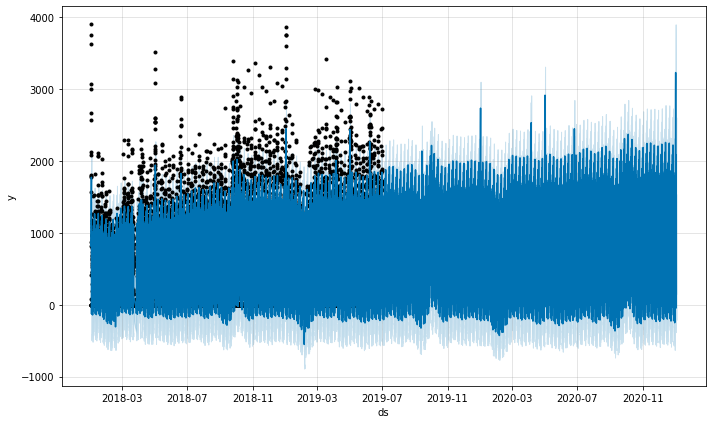

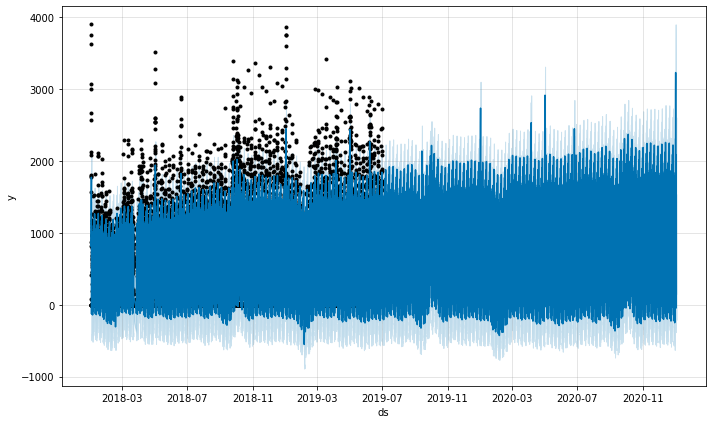

In [7]:
from fbprophet import Prophet
import pandas as pd

print("读取数据...")
df = pd.read_csv('./humen_test.csv')
df["ds"] = pd.to_datetime(df["ds"])
df["floor"] = 0.0 
df2 = df[df['ds'] < "2019-07-01 00:00:00"]
print("开始计算...")
m = Prophet(growth="linear", changepoint_prior_scale=0.007, 
        seasonality_prior_scale= 0.5, holidays_prior_scale=0.5, 
        weekly_seasonality=True, yearly_seasonality=True,
        daily_seasonality=True, seasonality_mode='multiplicative')
m.add_country_holidays(country_name='CN')
m.fit(df2)
future = m.make_future_dataframe(periods=13250, freq='H')
future["floor"] = 0.0 
fcst = m.predict(future)
print("完成计算")
m.plot(fcst)

因素分解


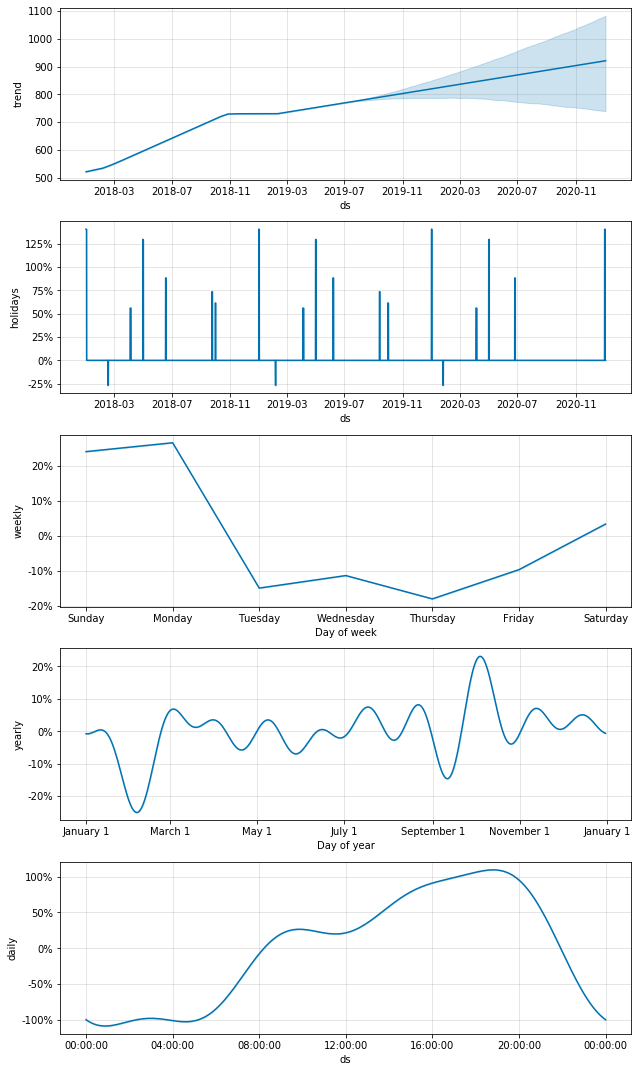

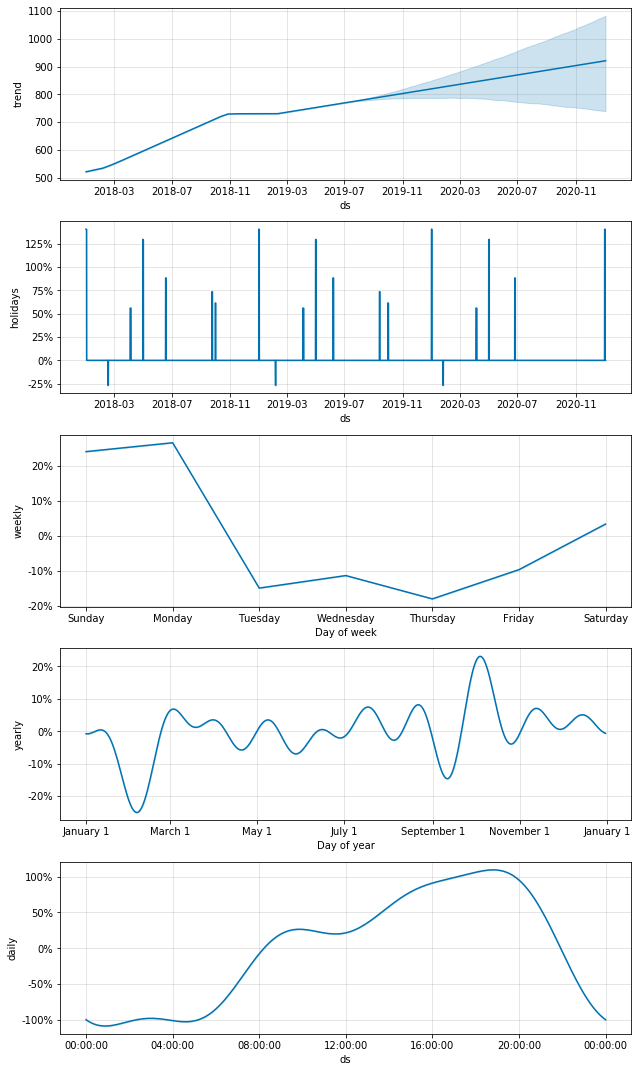

In [8]:
print("因素分解")
m.plot_components(fcst)

In [10]:
import numpy as np 

fcst1 = fcst[["ds","yhat"]]
fcst1["yhat"] = np.where(fcst1["yhat"] <= 0.0001, 0.0, fcst["yhat"])
print("输出数据：")

plt.figure(figsize=(15, 3))
plt.grid(True)

df1 = df[df['ds'] > "2019-07-01 00:00:00"]
df1 = df1[df1['ds'] < "2019-08-01 00:00:00"]
df1 = df1["y"]

pre = fcst1
#pre['peak_hour'] = pre['ds'].apply(peak_hour)
pre1 = pre[pre['ds'] > "2019-07-01 00:00:00"]
pre1 = pre1[pre1['ds'] < "2019-08-01 00:00:00"]
x = pre1['ds']

pre1 = [ item for item in pre1["yhat"] ]

b = zip(x,pre1)
for i,item in enumerate(b):
    if item[0].hour >= 9 and item[0].hour <=9 and item[0].weekday() < 5: pre1[i] *= 1.35
    if item[0].hour >= 18 and item[0].hour <=18 and item[0].weekday() < 5: pre1[i] *= 1.1

with open('humen_result.csv',"w") as f:
    for items in zip(fcst1["ds"], fcst1["yhat"]):
        k = items[0]
        v = items[1]
        if item[0].hour >= 9 and item[0].hour <=9 and item[0].weekday() < 5: v *= 1.35
        if item[0].hour >= 18 and item[0].hour <=18 and item[0].weekday() < 5: v *= 1.1
        f.write("%04d-%02d-%02d %02d:%02d:%02d,%d\n"%(k.year,k.month,k.day,k.hour,k.minute,k.second,int(v) if v - int(v) < 0.5 else int(v)+1))


print("\n2019-07 模型预测进站量:%d 实际进站量:%d 总误差: %.4f%%"%(int(sum(pre1)),int(sum(df1)),(sum(pre1)-sum(df1))/sum(df1)*100.0))
plt.plot(x,df1,x,pre1)

输出数据：


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NameError: name 'plt' is not defined